<a href="https://colab.research.google.com/github/Basileus-1/final-work/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%9C%D0%B8%D1%88%D0%B0%D1%80%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
#  загрузка необходимых модулей
import pandas as pd
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [127]:
# загружаем датасет, скачанный с UCI для оценки энергоэффективности зданий. Выводим первые 10 строк по всем столбцам
dataset = pd.read_csv('/content/ENB2012_data.csv',';')
dataset.head(10)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [128]:
# проверяем значения данных в ячейках. Для корректного анализа необходимы значения float и int
dataset.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

In [129]:
# рассчитываем коэффициенты корреляции попарно для всех столбцов
dataset.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.816198e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.628580e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.571852e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.894225e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.603032e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
X6,4.816198e-17,-3.628580e-17,-2.571852e-17,-5.894225e-17,4.603032e-17,1.000000e+00,-9.408435e-16,-2.552689e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.408435e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.552689e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [130]:
# для достижения высокого результата выбираем значения коэффициентов выше 95%. Под данное условие попадают пары Х1-Х2, Х4-Х5, Y1-Y2
# При этом на целевые значения Y1 и Y2 из выявленных пар наибольшее значение оказывают X2 по сравнению с Х1 и Х5 по сравнению с Х4.

In [131]:
# Поэтому столбцы Х1 и Х4 можноубрать
dataset = dataset.drop(['X1','X4'], axis=1)
dataset.head(10)

,X2,X3,X5,X6,X7,X8,Y1,Y2
0,514.5,294.0,7.0,2,0.0,0,15.55,21.33
1,514.5,294.0,7.0,3,0.0,0,15.55,21.33
2,514.5,294.0,7.0,4,0.0,0,15.55,21.33
3,514.5,294.0,7.0,5,0.0,0,15.55,21.33
4,563.5,318.5,7.0,2,0.0,0,20.84,28.28
5,563.5,318.5,7.0,3,0.0,0,21.46,25.38
6,563.5,318.5,7.0,4,0.0,0,20.71,25.16
7,563.5,318.5,7.0,5,0.0,0,19.68,29.60
8,588.0,294.0,7.0,2,0.0,0,19.50,27.30
9,588.0,294.0,7.0,3,0.0,0,19.95,21.97


In [132]:
# теперь определяем целевые значения Y1 (нагрузки на отопление) и Y2 (нагрузки на охлаждение). Задаем два датафрейма -целевых значений и без них
trg = dataset[['Y1','Y2']]
trn = dataset.drop(['Y1','Y2'], axis=1)

In [180]:
# Для построения модели применим методы наименьших квадратов, случайный лес, ближайших соседей, опорных векторов. Оценка производится с помощью коэффициента детерминации
models = [LinearRegression(),
	          RandomForestRegressor(n_estimators=100, max_features ='sqrt'),
	          KNeighborsRegressor(n_neighbors=6),
	          SVR(kernel='linear'),
	          ]

In [181]:
# Производим разбивку на две выборки - тестовую и обучающую. Для тестовой определяем 40% экземпляров
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.4)

In [182]:
# Строим регрессию для каждого параметра - Y1 и Y2 
TestModels = DataFrame()
tmp = {}
for model in models:
  m = str(model) # получение имени модели вформате строки
  tmp['Model'] = m[:m.index('(')]
  for i in range(Ytrn.shape[1]):
    model.fit(Xtrn, Ytrn.iloc[:,i]) #обучение модели
    tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest.iloc[:,0], model.predict(Xtest)) # вычисление коэффициента детерминации
  TestModels = TestModels.append([tmp]) # формирование итогового датафрейма
TestModels.set_index('Model', inplace=True) # создание индекса по названию модели

<AxesSubplot:title={'center':'R2_Y2'}, xlabel='Model'>

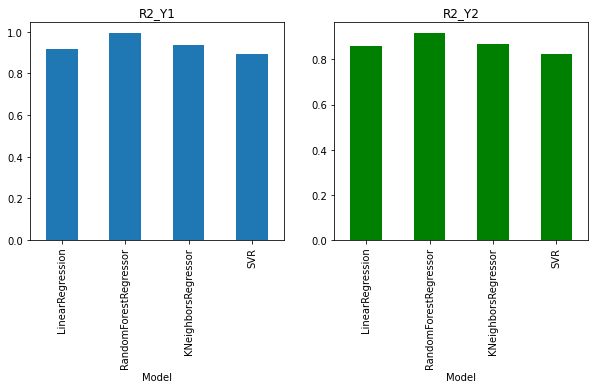

In [183]:
# Строим графики и определяем, какая модельдает лучшие значения
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='green', title='R2_Y2')

In [ ]:
# результат по графикам - самые высокие показатели дает модель Случайный лес. Коэффициент детерминации по параметру Y1 близок к 100%, по параметру Y2 близок к 95%.

In [184]:
# переобучим модель Случайного леса и определим количество функций, разрешенных для наилучшего разделения при построении дерева.
model = models[1]
model.fit(Xtrn, Ytrn)

RandomForestRegressor(max_features='sqrt')

In [ ]:
# результат - количество разрешенных объектов равно квадратному кореню из общего количества объектов в наборе данных.

In [185]:
# Определим вес каждого фактора в итоговой модели:
model.feature_importances_

array([0.41415264, 0.10569932, 0.38807502, 0.00927373, 0.05701243,
       0.02578686])

In [ ]:
# из значений видно, что набольшее влияние на нагрузку на охлаждение и нагрузку на отопление оказывают X2 = 41% (плозадь поверхности) и Х5 = 39% (общая высота помещения). Суммарно почти 80%.